<a href="https://colab.research.google.com/github/AjmiyaSalim/regression-models/blob/main/polynomial_regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Polynomial Regression on Ice Cream Selling Dataset

###  Introduction

**Polynomial Regression** is an extension of **Linear Regression** where the relationship between the independent variable (X) and the dependent variable (y) is modeled as an **nth-degree polynomial**. Unlike simple linear regression, which fits a straight line, polynomial regression can fit a **curved line**, making it more suitable for datasets with **non-linear patterns**.

The general form of a polynomial regression model is:

\[
y = b_0 + b_1x + b_2x^2 + \dots + b_nx^n
\]

Where:
- \( y \) is the predicted value (e.g., ice cream sales)
- \( x \) is the input feature (e.g., temperature)
- \( b_0, b_1, ..., b_n \) are the model coefficients

This model captures complex patterns that linear regression might miss, especially when the data points form a **curved trend**.

---

###  About the Dataset

The **Ice Cream Selling dataset** contains data on how ice cream sales vary with changes in temperature. It typically includes:

- **Temperature (X)**: The independent variable representing the weather temperature.
- **Sales (y)**: The dependent variable indicating the number of ice creams sold.

As temperature increases, sales tend to increase too — but the relationship is often **non-linear**, especially at extreme temperatures (e.g., sales may plateau or drop due to discomfort). Hence, **Polynomial Regression** is well-suited to model this behavior more accurately than a straight line.

In this notebook, we'll:
- Visualize the data
- Train a Polynomial Regression model
- Evaluate its performance
- Plot the fitted curve to understand how well the model captures the trend


In [ ]:
import pandas as pd
data=pd.read_csv('/content/Ice_cream selling data.csv')
data

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [ ]:
data.dtypes

,0
Temperature (°C),float64
Ice Cream Sales (units),float64


In [ ]:
data.isna().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [ ]:
X=data.iloc[:,0].values
y=data.iloc[:,1].values

## 📈 Visualizing the Relationship Between Feature and Target

We use a scatter plot along with the fitted **polynomial curve** to visually assess the relationship between the independent variable (X) and the dependent variable (y).

###  Why this visualization is important:

- **Non-Linearity Check**: Polynomial Regression is used when the relationship between X and y is **non-linear**. This plot helps verify if a simple linear model is insufficient.
- **Curved Trend Detection**: If the data points follow a **curved or parabolic trend**, this visualization confirms that a **polynomial model** would be more appropriate than a straight-line fit.
- **Outlier Identification**: Outliers can distort the shape of the polynomial curve, so visualizing the data helps identify and manage those points.
- **Degree Selection Insight**: A visual inspection can give an intuitive sense of whether a 2nd-degree, 3rd-degree, or higher polynomial might best fit the data.

In summary, this plot acts as a **diagnostic tool** to justify the use of Polynomial Regression and to guide the selection of the polynomial degree that best fits the underlying data pattern.


<Axes: >

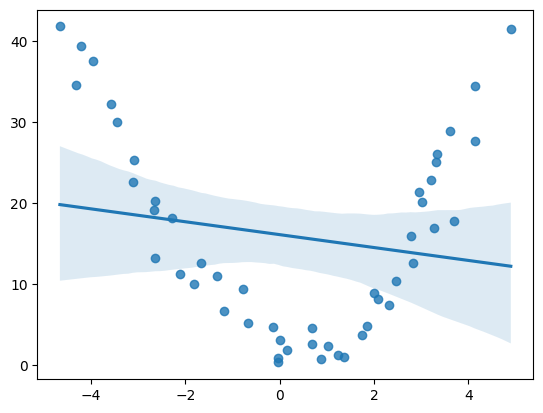

In [ ]:
import seaborn as sns
sns.regplot(x=X,y=y)

##  Generating Polynomial Features

To model a non-linear relationship using **Polynomial Regression**, we first need to transform our original feature(s) into polynomial features.

In the code below, we use `PolynomialFeatures` from `sklearn.preprocessing` with `degree=3`. This means we are creating a polynomial model of the form:

\[
y = b_0 + b_1x + b_2x^2 + b_3x^3
\]

###  What This Transformation Does:

The `fit_transform()` function generates a new feature matrix that includes:

- \( x^0 \) (bias term, always 1)
- \( x^1 \) (original feature)
- \( x^2 \) (squared term)
- \( x^3 \) (cubed term)

This allows the linear regression model to fit a **third-degree curve** to the data, capturing more complex patterns than a straight line.

###  Why Degree 3?

- A **degree-3 polynomial** is flexible enough to model curves with **one or two bends**.
- It helps in fitting data where the trend rises and falls — which is common in real-world cases like ice cream sales vs. temperature.
- Higher degrees (e.g., 4, 5...) may overfit the data, especially when working with small datasets.

This step is crucial to enabling the linear regression algorithm to **learn non-linear patterns** through linear combinations of polynomial terms.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
model=PolynomialFeatures(degree=3)
x_pol=model.fit_transform(X.reshape(-1,1))
x_pol

array([[ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01,
        -1.01342174e+02],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01,
        -8.04290944e+01],
       [ 1.00000000e+00, -4.21398476e+00,  1.77576676e+01,
        -7.48305407e+01],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01,
        -6.16140128e+01],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01,
        -4.58271260e+01],
       [ 1.00000000e+00, -3.45571170e+00,  1.19419433e+01,
        -4.12679133e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00,
        -3.00349918e+01],
       [ 1.00000000e+00, -3.08130332e+00,  9.49443018e+00,
        -2.92552193e+01],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00,
        -1.90868405e+01],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00,
        -1.86578436e+01],
       [ 1.00000000e+00, -2.65149803e+00,  7.03044182e+00,
        -1.86412027e+01],
       [ 1.00000000e+00, -2.28826400e+00,  5.23615213e+00,
      

##  Training and Predicting with Polynomial Regression

After generating polynomial features, we can now fit a regression model using **LinearRegression** from sklearn.linear_model.




In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_pol,y)
y_predict=lr.predict(x_pol)
y_predict

array([44.40996782, 39.31053442, 37.85016253, 34.20164009, 29.3669936 ,
       27.84308384, 23.7477249 , 23.44119881, 19.06704542, 18.86325493,
       18.85531056, 15.38643497, 13.8410158 , 11.48144005, 10.31404365,
        8.11512006,  7.22630241,  5.27383318,  4.87154499,  3.323643  ,
        3.11729978,  3.1136626 ,  3.04876105,  2.88116173,  2.9236437 ,
        2.92901417,  3.19659015,  3.51349879,  4.13047521,  4.55021287,
        6.27873181,  6.89413596,  7.8036807 ,  8.3033117 , 10.07584998,
       11.32473226, 14.19578772, 14.6641785 , 15.99442217, 16.65316365,
       18.8222559 , 19.52422529, 20.08608774, 20.33156918, 23.91935382,
       25.21844537, 31.69820001, 31.74146525, 45.63587212])

##  Generating a Smooth Curve for Visualization

To create a smooth and visually appealing polynomial regression curve, we need to:

1. **Sort the Input Feature (`X`)**: This ensures that the line is plotted from the lowest to the highest value, which prevents the curve from jumping back and forth.
2. **Transform the Sorted Input**: Using the same `PolynomialFeatures` transformation to ensure consistency with training.
3. **Predict the Sorted Outputs**: Apply the trained model to the sorted and transformed inputs to get a smooth prediction line.




In [ ]:
import numpy as np
X_sorted = np.sort(X, axis=0)
X_sorted_pol = model.transform(X_sorted.reshape(-1,1))
y_sorted_predict = lr.predict(X_sorted_pol)
y_sorted_predict

array([44.40996782, 39.31053442, 37.85016253, 34.20164009, 29.3669936 ,
       27.84308384, 23.7477249 , 23.44119881, 19.06704542, 18.86325493,
       18.85531056, 15.38643497, 13.8410158 , 11.48144005, 10.31404365,
        8.11512006,  7.22630241,  5.27383318,  4.87154499,  3.323643  ,
        3.11729978,  3.1136626 ,  3.04876105,  2.88116173,  2.9236437 ,
        2.92901417,  3.19659015,  3.51349879,  4.13047521,  4.55021287,
        6.27873181,  6.89413596,  7.8036807 ,  8.3033117 , 10.07584998,
       11.32473226, 14.19578772, 14.6641785 , 15.99442217, 16.65316365,
       18.8222559 , 19.52422529, 20.08608774, 20.33156918, 23.91935382,
       25.21844537, 31.69820001, 31.74146525, 45.63587212])

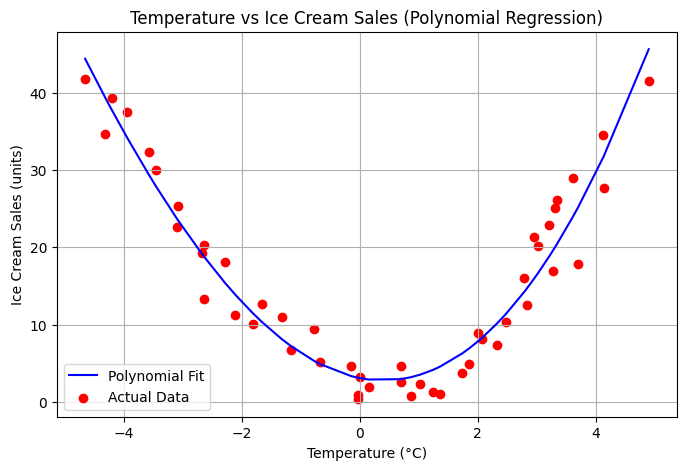

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(X_sorted, y_sorted_predict, color='blue', label='Polynomial Fit')
plt.scatter(X, y, color='red', label='Actual Data')
plt.title('Temperature vs Ice Cream Sales (Polynomial Regression)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y, y_predict)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predict)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 2.5866036680945004
MSE: 9.327243445671257
RMSE: 3.0540536088404306
R² Score: 0.9367011897445384


##  Model Evaluation

After training the Polynomial Regression model (degree = 3), we evaluated it using standard regression metrics.


### ✅ Conclusion

The model effectively captures the **non-linear trend** between temperature and ice cream sales. With a high R² score and low error values, the polynomial regression model proves to be a **strong and reliable predictor** for this dataset.

This project demonstrates how polynomial regression can significantly improve predictive performance when linear models fall short due to curvilinear relationships.
